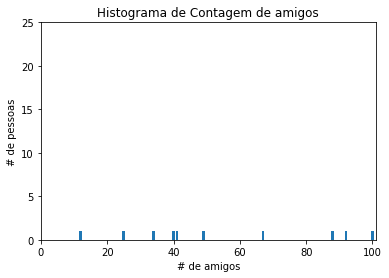

In [1]:
#Notebook para conceitos estatisticos em Python

import matplotlib.pyplot as plt
%matplotlib inline 
import collections as clt

num_friends = [100,49,41,40,25,34,67,88,92,12]

contagem_amigos = clt.Counter(num_friends)

xs = range(101) # Numero maior 100
ys = [contagem_amigos[x] for x in xs] # Altura é o numero de amigos

#Plotando grafico
plt.bar(xs,ys)
plt.axis ([0,101,0,25])
plt.title("Histograma de Contagem de amigos")
plt.xlabel("# de amigos")
plt.ylabel("# de pessoas")
plt.show()


In [2]:
num_points = len(num_friends) # Numero de pontos

#Maior Valor
largest_value = max(num_friends)
print(largest_value)

#Menor Valor
smallest_value = min(num_friends)
print(smallest_value)

100
12


In [3]:
#Função de Media
def mean(x):
    return sum(x)/len(x)

mean(num_friends)

54.8

In [4]:
#Função Mediana
def median(v):
    #Encontrando valores do meio de V
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n//2
    
    if n % 2 == 1:
        #impar retorna o valor do meio
        return sorted_v[midpoint]
    
    else:
        #par retorna a media dos valores
        lo = midpoint -1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) /2 
    
    
    
median(num_friends) # retornando mediana
    
    

45.0

In [5]:
#Realizando generalização da media para quantil

def quantile(x,p):
    p_index = int(p*len(x))
    return sorted(x)[p_index]

print(quantile(num_friends, 0.10))
print(quantile(num_friends, 0.25))
print(quantile(num_friends, 0.75))
print(quantile(num_friends, 0.90))



25
34
88
100


In [6]:
#Moda
def mode(x):
    #valores de moda no dataset
    counts = Counter(x)
    max_count = max(counts.value())
    return [x_i for x_i, count in counts.iteritems()
           if count==max_count]

In [7]:
#Definindo Apmplitude dos dados

def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

88

In [8]:
# Obtendo Variancia e DesvioPadrao

import math

def sum_of_squares(n):
    return sum(i**2 for i in n)

def de_mean(x):
    x_bar = mean(x)
    return[x_i-x_bar for x_i in x]

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations)/(n-1)

#Print obtendo Variancia
variance(num_friends)

#Obtendo Desvio Padrao
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

30.319777190620794

In [11]:
import numpy as np

dayli_minutes =  [10,19,71,23,55,63,86,40,37,66]

def covariance(x,y):
    n = len(x)
    return np.dot(de_mean(x),de_mean(y)) / (n-1)

covariance(num_friends,dayli_minutes)

-333.22222222222223

In [12]:
#obtendo correlação
def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y >0:
        return covariance(x,y)/stdev_x/stdev_y
    else:
        return 0 # se nao houver amplitude , correlação = 0 
    
correlation(num_friends,dayli_minutes)

-0.43840399712503003

In [16]:
#removendo outlier

outlier = num_friends.index(100)

num_friends_good =[x for i, x in enumerate(num_friends) if i != outlier]

dayli_friends_good =[x for i, x in enumerate(dayli_minutes) if i != outlier]

correlation(num_friends_good, dayli_friends_good)

-0.2289627663999238

In [ ]:
A covariância entre duas variáveis pode ser obtida de dados de variância[1]. Para variáveis aleatórias X e Y, sejam:

{\displaystyle \operatorname {var} (X)\,} {\displaystyle \operatorname {var} (X)\,} é a variância populacional de X
{\displaystyle \operatorname {var} (Y)\,} {\displaystyle \operatorname {var} (Y)\,} é a variância populacional de Y
{\displaystyle \operatorname {var} (X+Y)\,} {\displaystyle \operatorname {var} (X+Y)\,} é a variância populacional de uma variável obtida a partir da soma simples das variáveis X e Y.
"a" e "b" são constantes
Então, teremos:

{\displaystyle \operatorname {cov} (X,Y)={\frac {\operatorname {var} (aX+bY)-a^{2}\operatorname {var} (X)\,-b^{2}\operatorname {var} (Y)\,}{2ab}}} {\displaystyle \operatorname {cov} (X,Y)={\frac {\operatorname {var} (aX+bY)-a^{2}\operatorname {var} (X)\,-b^{2}\operatorname {var} (Y)\,}{2ab}}}